In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [ ]:
model = KMeans(n_clusters=3)
model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
print('각 클러스터 중심점 좌표: ', model.cluster_centers_)
print('각 샘플의 label: ', model.labels_)
print('중심으로부터의 거리의 합=Inertia: ', model.inertia_)
print('반복 횟수: ', model.n_iter_)
print("fit될 때까지 살펴본 feature 수: ", model.n_features_in_)

각 클러스터 중심점 좌표:  [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
각 샘플의 label:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
중심으로부터의 거리의 합=Inertia:  78.851441426146
반복 횟수:  3
fit될 때까지 살펴본 feature 수:  4


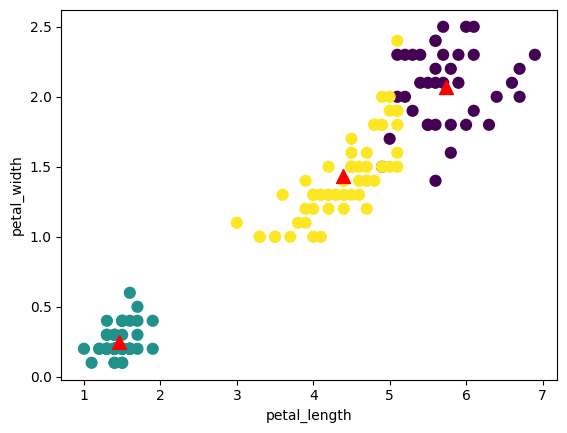

In [ ]:
plt.scatter(X_train.iloc[:, 2], X_train.iloc[:, 3], c=model.labels_, s=60)
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3], c='red', s=100, marker='^')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

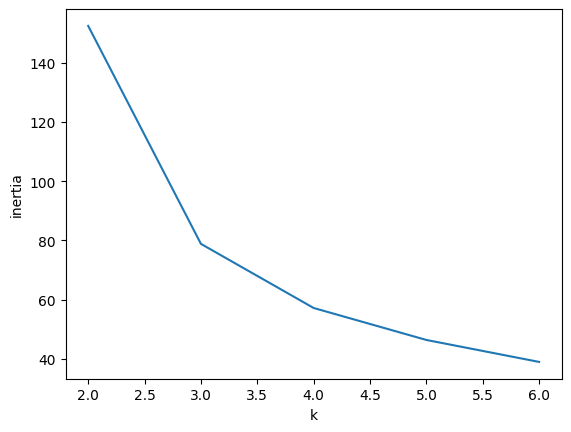

In [ ]:
inertia = []
for k in range(2, 7):
  model_tmp = KMeans(n_clusters=k)
  model_tmp.fit(X_train)
  inertia.append(model_tmp.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [ ]:
sample_new = [[4.5, 3.0, 1.5, 0.3]]
model.predict(sample_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [ ]:
def dist(a, b):
  return np.sqrt(np.sum((a-b)**2))

for i in range(3):
  print("클러스터 {}와의 거리: {}".format(i, dist(sample_new, model.cluster_centers_[i])))

클러스터 0와의 거리: 5.163333598598439
클러스터 1와의 거리: 0.6660180177742943
클러스터 2와의 거리: 3.4184957837500938


Text(0, 0.5, 'Y')

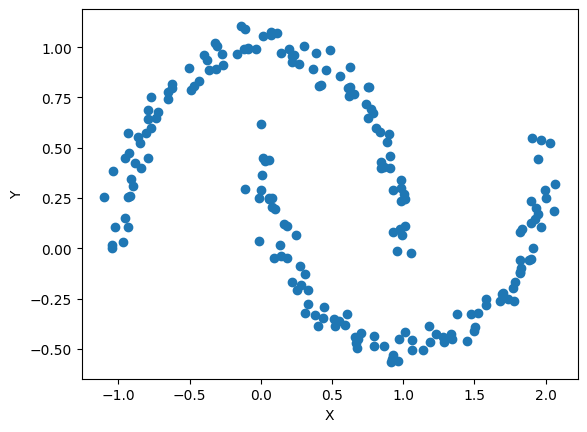

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X")
plt.ylabel("Y")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

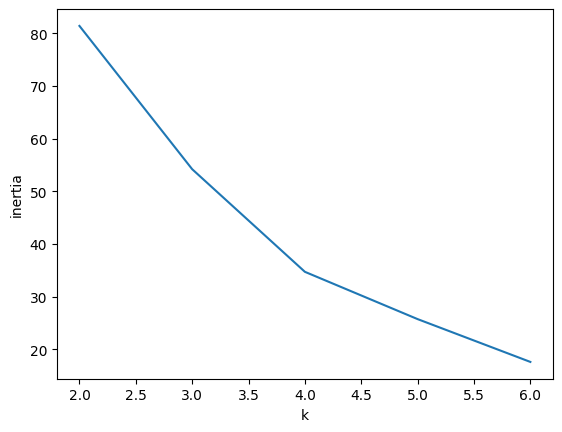

In [13]:
inertia = []
for k in range(2, 7):
  model_tmp = KMeans(n_clusters=k)
  model_tmp.fit(X)
  inertia.append(model_tmp.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [17]:
model = KMeans(n_clusters=4)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

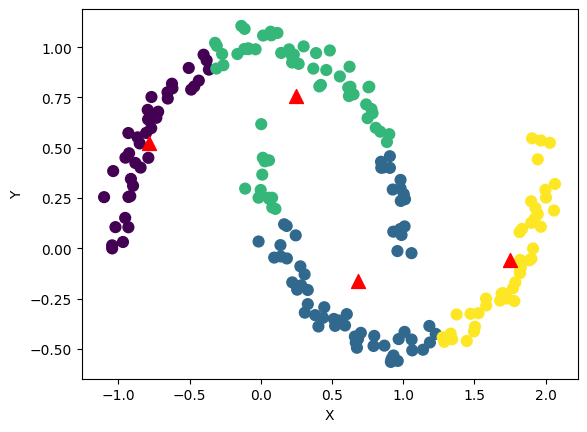

In [24]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c= model.labels_, s=60)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=100, marker='^')

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=0.2, min_samples=10)

In [26]:
labels = dbscan.labels_
print(labels)

[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1
 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0
 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0
 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1
 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 0 0 

Text(0, 0.5, 'Y')

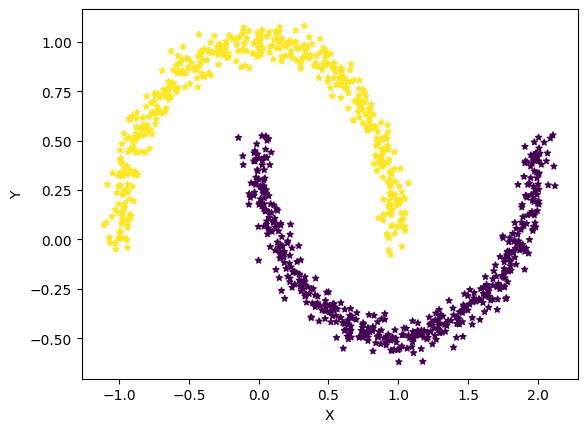

In [27]:
core_mask = np.zeros_like(labels, dtype=bool)
core_mask[dbscan.core_sample_indices_] = True
anomalies_mask = labels == -1
non_core_mask = ~(core_mask | anomalies_mask)
non_cores = X[non_core_mask]
cores = dbscan.components_
anomalies = X[anomalies_mask]
non_cores = X[non_core_mask]


plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
plt.xlabel("X")
plt.ylabel("Y")

In [29]:
H, M = map(int, input().split())

def alarm(H, M):
    total = (60*H + M) - 45
    H = total//60
    M = total%60
    print("{} {}".format(H, M))

alarm(H, M)


0 30
-1 45
